In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv")

In [5]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
data.info

<bound method DataFrame.info of         ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  


In [7]:
data.shape


(1143, 11)

We have 1143 rows and 11 colums of features


In [9]:
print(data['age'].unique())

['30-34' '35-39' '40-44' '45-49']


There are 4 category of ages.

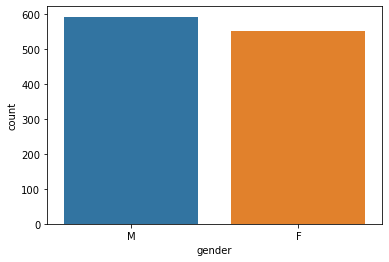

In [26]:
sns.countplot(x="gender",data = data)
plt.show()

Males are more than females.

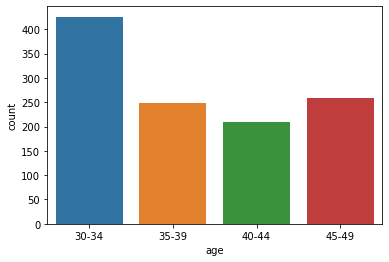

In [27]:
sns.countplot(x="age",data = data)
plt.show()

Age group of 30-34 is the most for this campaign analysis.

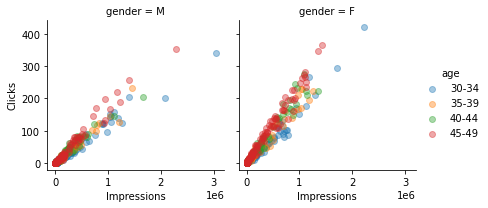

In [13]:
g = sns.FacetGrid(data,col = 'gender',hue = 'age')
g.map(plt.scatter,'Impressions', 'Clicks', alpha=0.4)
g.add_legend()

Females of age group 45-49 click the most ads.

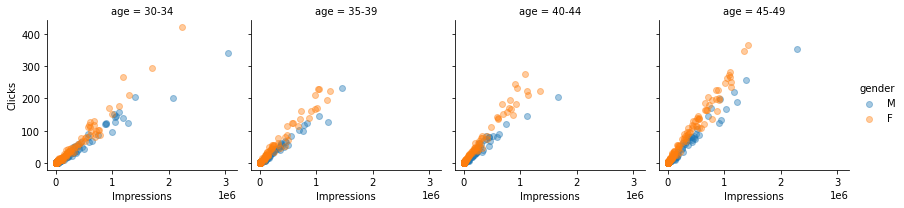

In [14]:
g = sns.FacetGrid(data,col = 'age',hue = 'gender')
g.map(plt.scatter,'Impressions', 'Clicks', alpha=0.4)
g.add_legend()

Females of every age group have more clicks than males.

In [28]:
print(data['xyz_campaign_id'].unique())

[ 916  936 1178]


There three categories of campaigns in xyz_campaign_id.

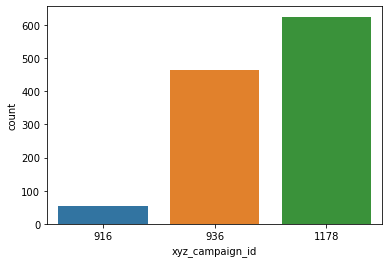

In [15]:
sns.countplot(x="xyz_campaign_id",data = data)
plt.show()

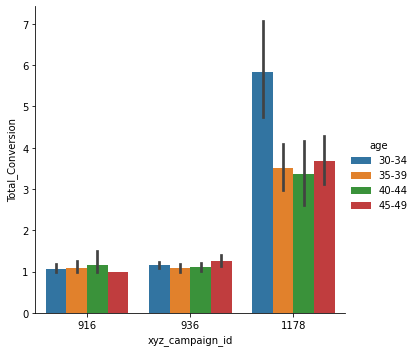

In [23]:
sns.catplot(x="xyz_campaign_id", y="Total_Conversion",hue="age",kind="bar",data=data)

People of age group 30-34 enquire most about the ads.

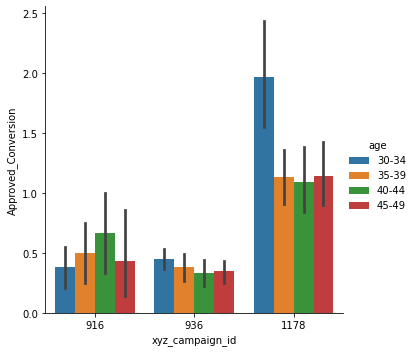

In [25]:
sns.catplot(x="xyz_campaign_id", y="Approved_Conversion",hue="age",kind="bar",data=data)

People of age 30-34 buy the most products.

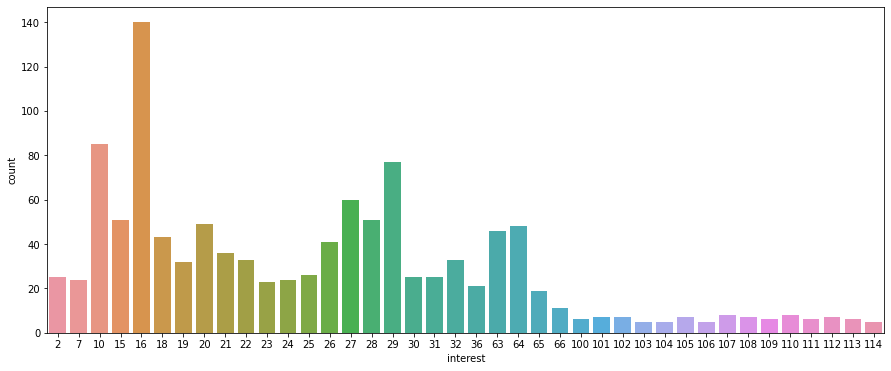

In [31]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'interest',data = data)
plt.show()

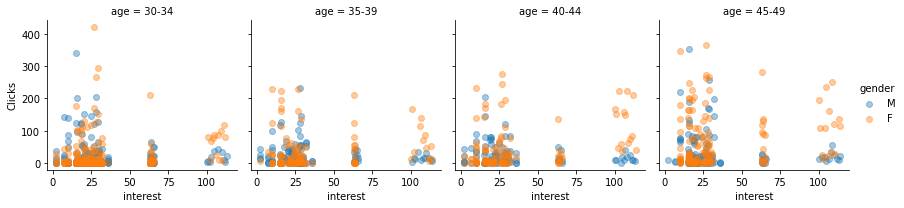

In [32]:
g = sns.FacetGrid(data,col = 'age',hue = 'gender')
g.map(plt.scatter,'interest', 'Clicks', alpha=0.4)
g.add_legend()

People with interest below 40 click more, also we can see that it also elevates after 100. 

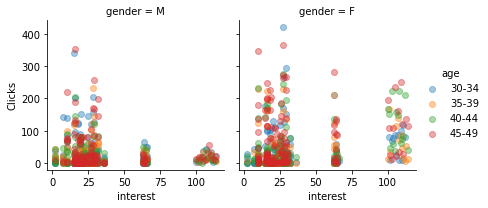

In [36]:
g = sns.FacetGrid(data,col = 'gender', hue = 'age')
g.map(plt.scatter,'interest', 'Clicks', alpha = 0.4)
g.add_legend()

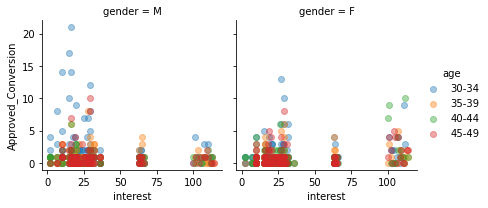

In [40]:
g = sns.FacetGrid(data, col = 'gender',hue = 'age')
g.map(plt.scatter, 'interest','Approved_Conversion',alpha = 0.4)
g.add_legend()


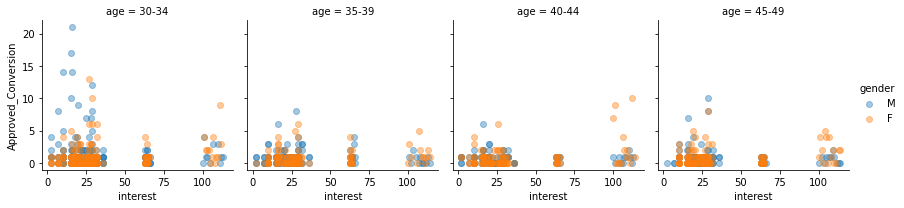

In [41]:
g = sns.FacetGrid(data, col = 'age',hue = 'gender')
g.map(plt.scatter, 'interest','Approved_Conversion',alpha = 0.4)
g.add_legend()

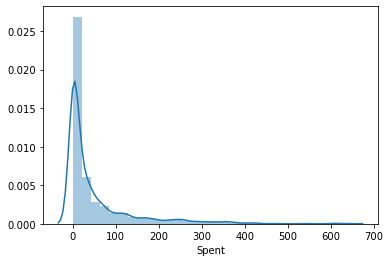

In [150]:

sns.distplot(data['Spent'],bins=30)

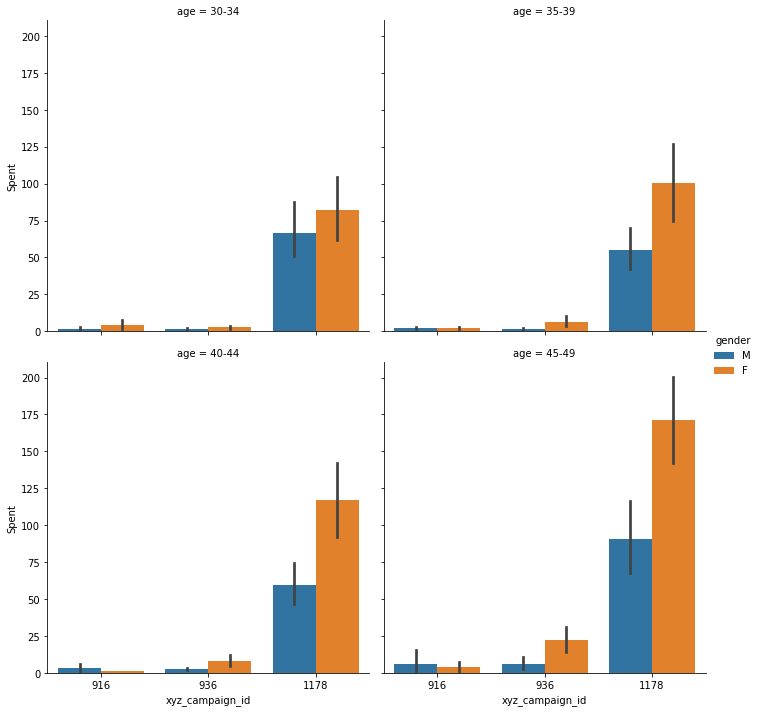

In [43]:
sns.catplot(x="xyz_campaign_id", y="Spent",hue="gender", col="age",kind="bar",data=data,col_wrap=2)


Feamles spend more than Males.

# Linear Regression


In [85]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [130]:
data = data.replace('30-34',0.0011)
data = data.replace('35-39',0.0012)
data = data.replace('40-44',0.0013)
data = data.replace('45-49',0.0014)

In [131]:
data = data.replace('M',1)
data = data.replace('F',0)

In [132]:
X = data[['age', 'gender', 'interest', 'Impressions', 'Clicks', 'Spent',
       'Total_Conversion']]
y = data['Approved_Conversion']

age, gender, interest, Impressions, Clicks, Spent and Total_Conversion are the only useful features.

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [145]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [146]:
y_pred = regressor.predict(X_test)

In [147]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7895319333663948

In [148]:
regressor.score(X_test, y_test)

0.7895319333663948

We have an accuracy of 78.95%